# This a jupyter notebook guide on domain interaction anaylsis for chr2, in the regime of A,B compartments

by Pu Zheng 

2020.06.06


## Import packages

In [1]:
# imports
import sys, os, glob, time, copy
import numpy as np
import scipy
import pickle

sys.path.append(os.path.abspath(r"..\."))

import source as ia

from scipy.signal import find_peaks
from scipy.spatial.distance import cdist,pdist,squareform

print(os.getpid()) # print this so u can terminate through cmd / task-manager

2444


## Import plotting

In [2]:
# Required plotting setting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')
_font_size = 7.5

In [3]:
# Required plotting parameters
from source.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width,_font_size

In [4]:
# figure folder
parent_figure_folder = r'\\10.245.74.158\Chromatin_NAS_4\Chromatin_Share\cleaned_repeat_figure'
figure_folder = os.path.join(parent_figure_folder, 'Figure3')
print(figure_folder)
if not os.path.exists(figure_folder):
    os.makedirs(figure_folder)
    print("generating this folder")

\\10.245.74.158\Chromatin_NAS_4\Chromatin_Share\cleaned_repeat_figure\Figure3


# 0. Load data

In [5]:
## chr2 dataset
# load data containing candidates
data_folder = r'\\10.245.74.158\Chromatin_NAS_4\Chromatin_Share\Repicked_chromosome_data'

data_rep1 = pickle.load(open(os.path.join(data_folder, r'chr2_after_selection.pkl'), 'rb'))

## genomic coordinate info

In [7]:
# reference folder
ref_folder = r'\\10.245.74.69\Chromatin_NAS_3\20191007_CTP07_chr2\Analysis'
# load genomic positions
genomic_dic = ia.get_img_info.Load_Region_Positions(ref_folder)
mid_positions = np.array([_v['midpoint'] for _k,_v in genomic_dic.items()])

genomic_distance_map = squareform(pdist(mid_positions[:,np.newaxis]))
genomic_distance_entries = genomic_distance_map[np.triu_indices(len(genomic_distance_map),1)]

genomic_positions_Mb = np.round(mid_positions/1e6, 2)
# genomic dist map
genomic_dist_mat = squareform(pdist(genomic_positions_Mb[:,np.newaxis]))

region_starts = np.array([_v['start'] for _k,_v in genomic_dic.items()], dtype=np.int)
region_ends = np.array([_v['end'] for _k,_v in genomic_dic.items()], dtype=np.int)

- Importing csv file: \\10.245.74.69\Chromatin_NAS_3\20191007_CTP07_chr2\Analysis\Region_Positions.csv
- header: ['region', 'chr', 'start', 'end', 'midpoint']
-- 935 genomic regions loaded!


In [8]:
zxys_rep1_list = np.array(data_rep1['dna_hzxys'])[:,:,1:4]
distmap_rep1_list = np.array([squareform(pdist(_zxy)) for _zxy in zxys_rep1_list])

# generate median distance map
median_distance_map = np.nanmedian(distmap_rep1_list, axis = 0)
# generate contact map
contact_th = 500
contact_map = np.nanmean(distmap_rep1_list < contact_th, axis=0)
# load Hi-C
hic_raw_map = np.load(r'\\10.245.74.158\Chromatin_NAS_0\Hi-C\chr2_hg38_50000.npy')

C:\Users\Bogdan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


In [74]:
hic_raw_map = np.load(r'\\10.245.74.158\Chromatin_NAS_0\Hi-C\chr2_hg38_50000.npy')

In [77]:
hic_raw_map = np.load(r'\\10.245.74.158\Chromatin_NAS_0\Hi-C\chr2_hg38_50000.npy')
keys = np.sort(list(genomic_dic.keys()))
coords = [genomic_dic[i]['chr']+':'+str(genomic_dic[i]['start'])+'-'+str(genomic_dic[i]['end']) for i in keys]
hic_raw_map[np.isnan(hic_raw_map)]=0
fid = open(save_folder+r'\hi-c_contacts_chromosome2.tsv','w')
head = '\t'+'\t'.join(coords)+'\n'
fid.write(head)
im_save =hic_raw_map[keys][:,keys].astype(int)
icoord = 0
for row in im_save.astype(str):
    row_ = coords[icoord]+'\t'+'\t'.join(row)+'\n'
    fid.write(row_)
    icoord+=1
fid.close()

In [50]:
hic_file = r'C:\Users\Bogdan\Dropbox\2020 Chromatin Imaging Manuscript\Revision\DataForReviewers\population-averaged\hi-c_contacts_chromosome2.tsv'
hic_txt = np.array([ln[:-1].split('\t')for ln in open(hic_file,'r') if len(ln)>1])
hic_raw_map = np.array(hic_txt[1:,1:],dtype=np.float)



mat = np.log(hic_raw_map)
mat[np.isinf(mat)|np.isnan(mat)]=np.min(mat[~(np.isinf(mat)|np.isnan(mat))])

plt.figure(figsize=(20,20))
plt.imshow(mat,cmap='seismic',vmax=4)

In [51]:
mat = np.log(hic_raw_map)
mat[np.isinf(mat)|np.isnan(mat)]=np.min(mat[~(np.isinf(mat)|np.isnan(mat))])

C:\Users\Bogdan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\Bogdan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


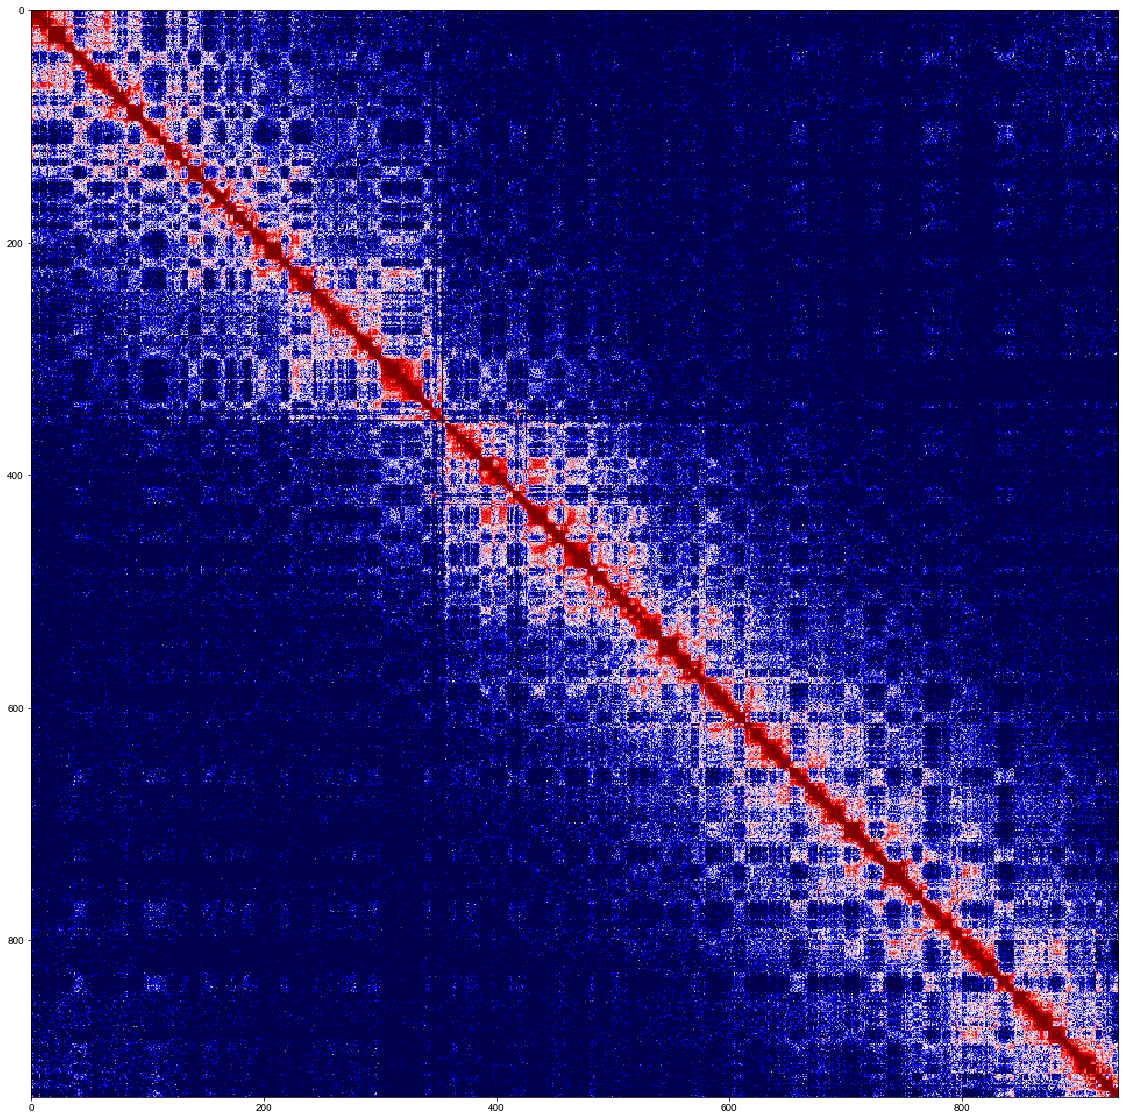

In [52]:
plt.figure(figsize=(20,20))
plt.imshow(mat,cmap='seismic',vmax=4)

In [17]:
save_folder = r'C:\Users\Bogdan\Dropbox\2020 Chromatin Imaging Manuscript\Revision\DataForReviewers\population-averaged'
fid = open(save_folder+r'\median_distance_chromosome2.tsv','w')
head = '\t'+'\t'.join(coords)+'\n'
fid.write(head)
icoord = 0
for row in (median_distance_map).astype(int).astype(str):
    row_ = coords[icoord]+'\t'+'\t'.join(row)+'\n'
    fid.write(row_)
    icoord+=1
fid.close()


fid = open(save_folder+r'\proximity-probability_chromosome2.tsv','w')
head = '\t'+'\t'.join(coords)+'\n'
fid.write(head)
im_save = np.round(contact_map,15)
icoord = 0
for row in im_save.astype(str):
    row_ = coords[icoord]+'\t'+'\t'.join(row)+'\n'
    fid.write(row_)
    icoord+=1
fid.close()



In [28]:
fid = open(save_folder+r'\hi-c_contacts_chromosome2.tsv','w')
head = '\t'+'\t'.join(coords)+'\n'
fid.write(head)
im_save =hic_raw_map[keys][:,keys].astype(int)
icoord = 0
for row in im_save.astype(str):
    row_ = coords[icoord]+'\t'+'\t'.join(row)+'\n'
    fid.write(row_)
    icoord+=1
fid.close()

In [26]:
hic_raw_map[keys,keys].shape

(935,)

In [12]:
#plt.imshow(np.log(hic_raw_map))

## 0.1 prepare data domains and compartments

Note: Please check what parameter you have used to call domains for chr2 and run it here

### 0.1.1 domains

In [7]:
sys.path.append(r"\\10.245.74.158\Chromatin_NAS_4\Chromatin_Share\BB_forPu")
import DomainAnalysis as da
import multiprocessing as mp

num_threads=32
domain_corr_cutoff = 0.85 
domain_dist_cutoff = 1000 # nm

_domain_args = [(_hzxys[:,1:], 4, 1000, domain_corr_cutoff, domain_dist_cutoff) 
                     for _hzxys in data_rep1['dna_hzxys']]
_domain_time = time.time()

print(f"Multiprocessing call domain starts", end=' ')
if 'domain_starts' not in data_rep1:
    with mp.Pool(num_threads) as domain_pool:
        domain_results = domain_pool.starmap(da.get_dom_starts_cor, _domain_args)
        domain_pool.close()
        domain_pool.join()
        domain_pool.terminate()
    # save
    data_rep1['domain_starts'] = [np.array(_r[-1]) for _r in domain_results]
    data_rep1['params']['domain_corr_cutoff'] = domain_corr_cutoff
    data_rep1['params']['domain_dist_cutoff'] = domain_dist_cutoff
    
print(f"in {time.time()-_domain_time:.3f}s.")

Multiprocessing call domain starts in 76.038s.


### 0.1.2: domain interaction calling

In [ ]:
# cutoff for:
#  domain pairs touching each other -> insulation score <= 2
#  domain pairs fully intermix with each other -> insulation score <= 1
domain_interact_cutoff = 2
domain_intermix_cutoff = 1
#

# Please fill in code here

In [ ]:
cutoffs = [1,1.25,1.5,1.75,2]

from tqdm import tqdm_notebook as tqdm
fuses_all_v2 = [[] for cutoff in cutoffs]
for ichr in tqdm(range(len(zxys))):
    zxy = zxys[ichr]
    dom_starts_f = dom_starts_fs[ichr]

    bad = np.isnan(zxy[:,0])
    zxy_ = zxy[~bad]
    mat=squareform(pdist(zxy_))
    dom_starts = np.zeros(len(zxy))
    dom_starts[dom_starts_f[:-1]]=1
    dom_starts = list(np.where(dom_starts[~bad])[0])+[len(zxy_)]
    fuses_all_v2_=[[] for cutoff in cutoffs]
    for i in range(len(dom_starts)-1):
        for j in range(i):
            in_i = squareform(mat[dom_starts[i]:dom_starts[i+1],dom_starts[i]:dom_starts[i+1]])
            in_j = squareform(mat[dom_starts[j]:dom_starts[j+1],dom_starts[j]:dom_starts[j+1]])
            in_doms = np.median(np.concatenate([in_i,in_j]))
            out_doms = np.median(mat[dom_starts[i]:dom_starts[i+1],dom_starts[j]:dom_starts[j+1]])
            ins_score = out_doms/in_doms
            for icutoff,cutoff in enumerate(cutoffs):
                if ins_score<cutoff:
                    fuses_all_v2_[icutoff].append([i,j])
    for icutoff,cutoff in enumerate(cutoffs):
        fuses_all_v2[icutoff].append(fuses_all_v2_[icutoff])


#save_fl  = 'dom_fuses_chr21_newAnalysis___'+str(int(cutoff_cor*100))+'__cutoff'+str(cutoffs)+'.npy'
#print(os.path.abspath(save_fl))
#np.save(save_fl,fuses_all_v2)